## Project No2 - Concentration Theorems

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib as mpl

mpl.rcParams['font.size'] = 16

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

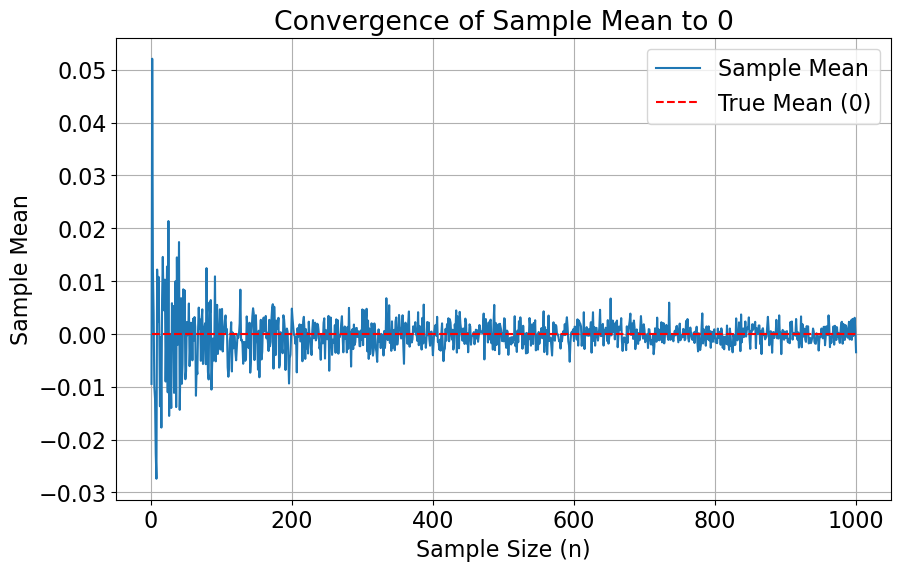

In [2]:
# TO DO CELL
# Set the number of simulations and maximum sample size
n_sim = 500
max_n = 1000

# Initialize an array to store the sample means
sample_means = np.zeros((max_n, n_sim))

# Perform simulations for increasing sample sizes
for n in range(1, max_n + 1):
    samples = np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim))
    sample_means[n - 1, :] = np.mean(samples, axis=0)

# Calculate the theoretical mean (which is 0)
true_mean = np.zeros(max_n)

# Create a plot to visualize the convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), sample_means.mean(axis=1), label='Sample Mean')
plt.plot(range(1, max_n + 1), true_mean, 'r--', label='True Mean (0)')
plt.xlabel('Sample Size (n)')
plt.ylabel('Sample Mean')
plt.legend()
plt.title('Convergence of Sample Mean to 0')
plt.grid(True)
plt.show()

#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

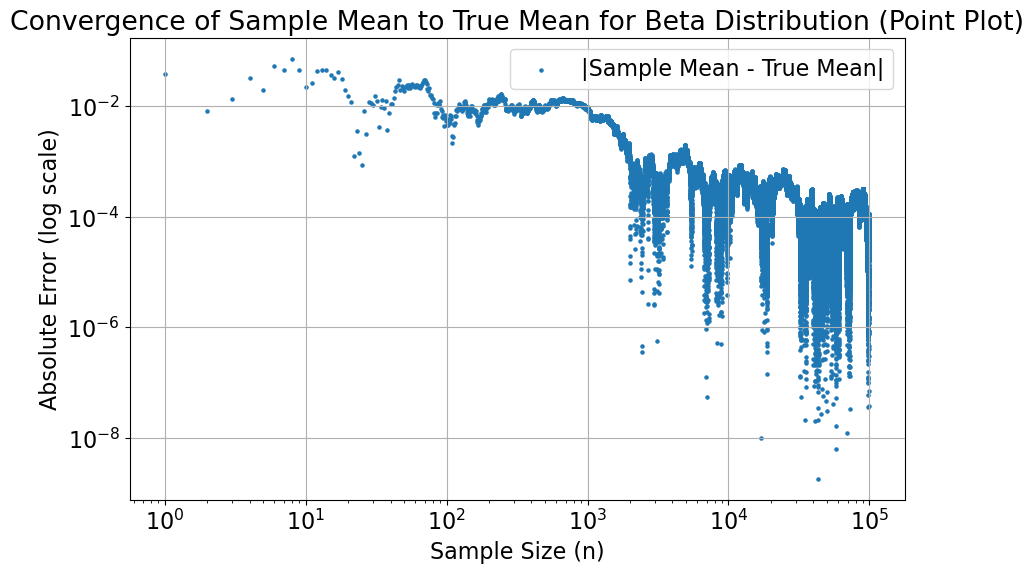

In [3]:
# Parameters for the Beta distribution
a = 2
b = 5

# Maximum sample size
max_n = 100000

# Generate one set of random variables X1, X2, ..., X_max_n just one time
random_variables = np.random.beta(a, b, size=max_n)

# Calculate partial averages X_bar_n for different values of n <= max_n
partial_averages = np.cumsum(random_variables) / np.arange(1, max_n + 1)

# Create a point plot (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(range(1, max_n + 1), np.abs(partial_averages - a / (a + b)), label='|Sample Mean - True Mean|', s=5)
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xlabel('Sample Size (n)')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.title('Convergence of Sample Mean to True Mean for Beta Distribution (Point Plot)')
plt.grid(True)
plt.show()


**To Discuss:** When doing this calculations, what time of convergence are we studying? almost surely or in probability? 

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning the low peaks in the plot? 

In the calculations and plots provided in the previous responses, we are studying convergence in probability.

The general trend in the plot is a decreasing function. As the sample size (n) increases, the absolute error between the sample mean and the true mean decreases.

The low peaks or fluctuations in the plot are characteristic of the stochastic nature of random sampling. These fluctuations represent random variability in the sample mean as a result of drawing random samples from the Beta distribution. The peaks indicate instances where the sample mean temporarily deviates from the true mean before converging back toward it.

#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n | > \epsilon \right)$ for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

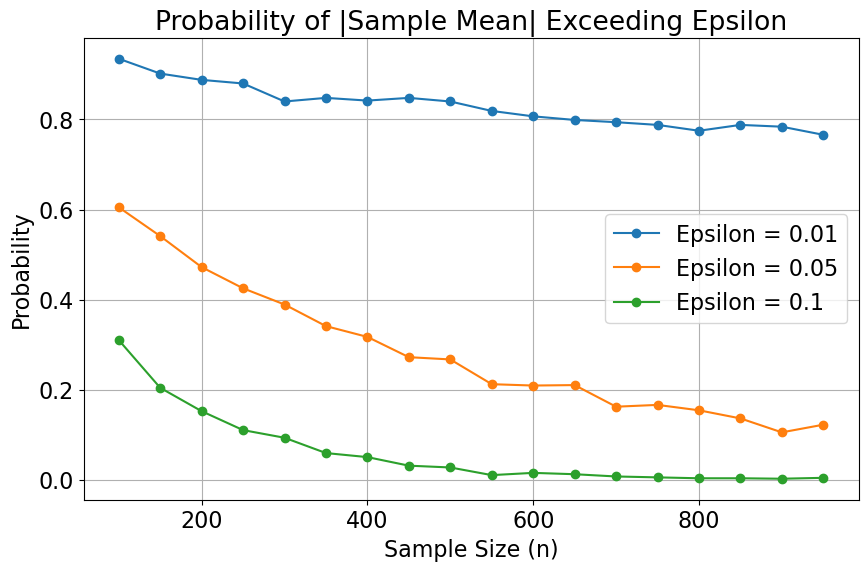

In [4]:
# Parameters
num_simulations = 1000
sample_sizes = list(range(100, 1000, 50))
epsilon_values = [0.01, 0.05, 0.1]  # Values of epsilon

# Dictionary to store probabilities for each epsilon value
probabilities = {epsilon: [] for epsilon in epsilon_values}

# Simulate and compute probabilities for different n and epsilon
for epsilon in epsilon_values:
    for n in sample_sizes:
        count_exceed_epsilon = 0
        for _ in range(num_simulations):
            sample = np.random.normal(0, 1, n)  # Generate a sample of size n from a standard normal distribution
            sample_mean = np.mean(sample)
            if abs(sample_mean) > epsilon:
                count_exceed_epsilon += 1
        probability = count_exceed_epsilon / num_simulations
        probabilities[epsilon].append(probability)

# Plot results for different epsilon values
plt.figure(figsize=(10, 6))
for epsilon in epsilon_values:
    plt.plot(sample_sizes, probabilities[epsilon], marker='o', linestyle='-', label=f'Epsilon = {epsilon}')

plt.title('Probability of |Sample Mean| Exceeding Epsilon')
plt.xlabel('Sample Size (n)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtain from using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$
At the end of the day, you should obtain something like this

<img src="solution_1_34.png" alt="Solution" />

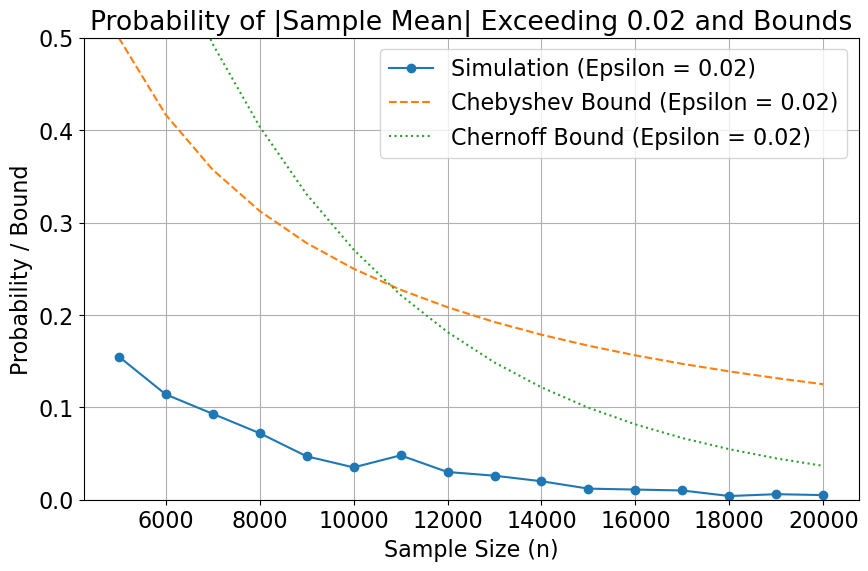

In [5]:
# Parameters
num_simulations = 1000
sample_sizes = list(range(5000, 20001, 1000))
epsilon = 0.02  # Fixed epsilon value

# Lists to store probabilities and bounds for the fixed epsilon value
probabilities = []
chebyshev_bounds = []
chernoff_bounds = []

# Simulate and compute probabilities, Chebyshev bounds, and Chernoff bounds for different n
for n in sample_sizes:
    count_exceed_epsilon = 0
    for _ in range(num_simulations):
        sample = np.random.normal(0, 1, n)  # Generate a sample of size n from a standard normal distribution
        sample_mean = np.mean(sample)
        if abs(sample_mean) > epsilon:
            count_exceed_epsilon += 1
    probability = count_exceed_epsilon / num_simulations
    probabilities.append(probability)
    
    # Calculate Chebyshev bound
    chebyshev_bound = 1 / (n * epsilon**2)
    chebyshev_bounds.append(chebyshev_bound)
    
    # Calculate Chernoff bound
    chernoff_bound = 2 * np.exp(-epsilon**2 * n / 2)
    chernoff_bounds.append(chernoff_bound)

# Plot results for the fixed epsilon value
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, probabilities, marker='o', linestyle='-', label=f'Simulation (Epsilon = {epsilon})')
plt.plot(sample_sizes, chebyshev_bounds, linestyle='--', label=f'Chebyshev Bound (Epsilon = {epsilon})')
plt.plot(sample_sizes, chernoff_bounds, linestyle=':', label=f'Chernoff Bound (Epsilon = {epsilon})')

plt.title(f'Probability of |Sample Mean| Exceeding {epsilon} and Bounds')
plt.xlabel('Sample Size (n)')
plt.ylabel('Probability / Bound')
plt.ylim(0, 0.5)  # Set the y-axis limits from 0 to 0.5
plt.legend()
plt.grid(True)
plt.show()


### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. If call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{\bar X_n - \mu}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is how the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

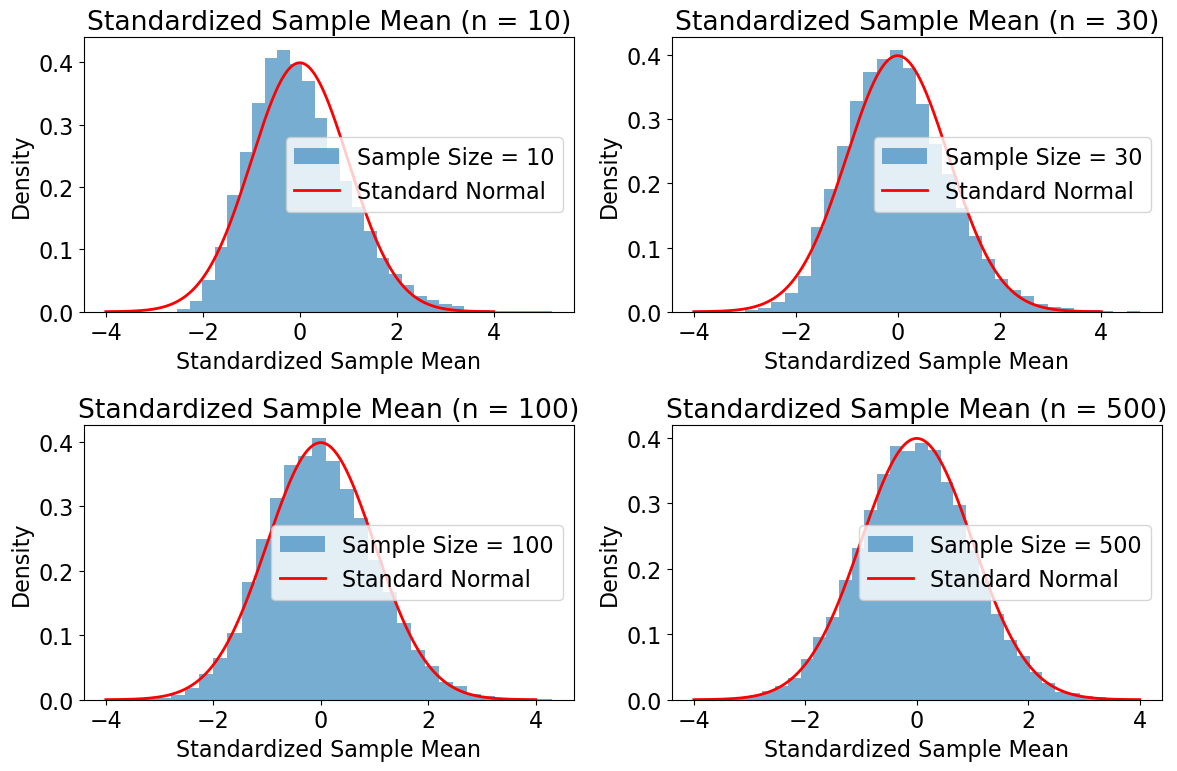

In [9]:
from scipy.stats import norm

# Parameters for the exponential distribution
lambda_parameter = 1.0  # Rate parameter (mean = 1 / lambda)
variance = 1.0 / (lambda_parameter**2)  # Variance = 1 / (lambda^2)

# Number of simulations and sample sizes
num_simulations = 10000
sample_sizes = [10, 30, 100, 500]

# Lists to store standardized sample means for each sample size
standardized_means = {n: [] for n in sample_sizes}

# Simulate and compute standardized sample means
for n in sample_sizes:
    for _ in range(num_simulations):
        sample = np.random.exponential(scale=1.0 / lambda_parameter, size=n)
        sample_mean = np.mean(sample)
        standardized_mean = np.sqrt(n) * (sample_mean - 1.0 / lambda_parameter) / np.sqrt(variance)
        standardized_means[n].append(standardized_mean)

# Plot histograms and compare to standard normal distribution
plt.figure(figsize=(12, 8))
for i, n in enumerate(sample_sizes):
    plt.subplot(2, 2, i + 1)
    plt.hist(standardized_means[n], bins=30, density=True, alpha=0.6, label=f'Sample Size = {n}')
    plt.title(f'Standardized Sample Mean (n = {n})')
    plt.xlabel('Standardized Sample Mean')
    plt.ylabel('Density')

    # Plot the standard normal distribution for comparison
    x = np.linspace(-4, 4, 1000)
    pdf = norm.pdf(x, loc=0, scale=1)
    plt.plot(x, pdf, 'r-', lw=2, label='Standard Normal')
    plt.legend()

plt.tight_layout()
plt.show()


#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


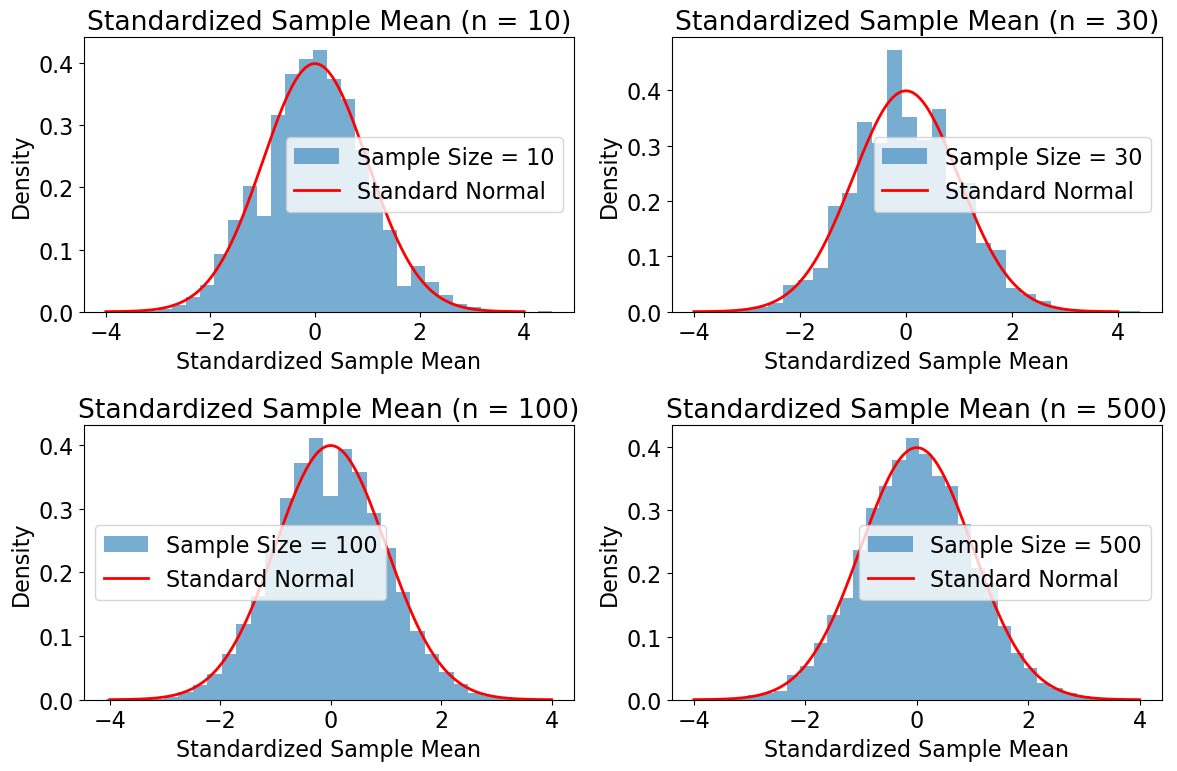

In [8]:
# Parameters for the Poisson distribution
lambda_parameter = 5  # Mean and variance of the Poisson distribution

# Number of simulations and sample sizes
num_simulations = 10000
sample_sizes = [10, 30, 100, 500]

# Lists to store standardized sample means for each sample size
standardized_means = {n: [] for n in sample_sizes}

# Simulate and compute standardized sample means
for n in sample_sizes:
    for _ in range(num_simulations):
        sample = np.random.poisson(lambda_parameter, size=n)
        sample_mean = np.mean(sample)
        standardized_mean = np.sqrt(n) * (sample_mean - lambda_parameter) / np.sqrt(lambda_parameter)
        standardized_means[n].append(standardized_mean)

# Plot histograms and compare to standard normal distribution
plt.figure(figsize=(12, 8))
for i, n in enumerate(sample_sizes):
    plt.subplot(2, 2, i + 1)
    plt.hist(standardized_means[n], bins=30, density=True, alpha=0.6, label=f'Sample Size = {n}')
    plt.title(f'Standardized Sample Mean (n = {n})')
    plt.xlabel('Standardized Sample Mean')
    plt.ylabel('Density')

    # Plot the standard normal distribution for comparison
    x = np.linspace(-4, 4, 1000)
    pdf = norm.pdf(x, loc=0, scale=1)
    plt.plot(x, pdf, 'r-', lw=2, label='Standard Normal')
    plt.legend()

plt.tight_layout()
plt.show()


#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the reading about [stable distributions](https://en.wikipedia.org/wiki/Stable_distribution).

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Jingsi Chen
- Member No2: 
- Member No3: